<a href="https://colab.research.google.com/github/dauvannam1804/Training-FairMOT-Paddle/blob/main/FairMOT_Paddle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Colab Notebooks/SN-GSR"

/content/drive/MyDrive/Colab Notebooks/SN-GSR


**Install PaddlePaddle**

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0


In [4]:
!pip install paddlepaddle-gpu==2.6.2.post120 -i https://www.paddlepaddle.org.cn/packages/stable/cu120/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cu120/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.0/797.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: opt-einsum
    Found existing installation: opt_einsum 3.4.0
    Uninstalling opt_einsum-3.4.0:
      Successfully uninstalled opt_einsum-3.4.0


In [5]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 GPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [6]:
!python -c "import paddle; print(paddle.__version__)"

2.6.2


**Install PaddleDetection**

In [7]:
# !git clone https://github.com/PaddlePaddle/PaddleDetection.git

In [8]:
%cd PaddleDetection
!pip install -r requirements.txt

/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 336.7/336.7 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 67.7 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1301 sha256=e8aa677da093ca9f928dda857de17eea840e47ab636fcd32858315018252bdad
  Stored in directory: /root/.cache/pip/wheels/9b/13/01/6f3a7fd641f90e1f6c8c7cded057f3394f451f340371c68f3d
Successfully built sklearn
  Attempting uninstall: opencv-python
    Found existing 

In [9]:
%cd PaddleDetection
!python setup.py install

[Errno 2] No such file or directory: 'PaddleDetection'
/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection
running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_

# **After installation, make sure the tests pass:**

In [10]:
!python ppdet/modeling/tests/test_architectures.py

W1203 15:57:12.102190  1982 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 12.0
W1203 15:57:12.103701  1982 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
.......
----------------------------------------------------------------------
Ran 7 tests in 13.135s

OK


# **Test Inference demo**

In [ ]:
# !python dataset/coco/download_coco.py

[12/01 16:06:40] ppdet.utils.download INFO: Downloading train2017.zip from http://images.cocodataset.org/zips/train2017.zip
100% 18883655/18883655 [06:39<00:00, 47321.46KB/s]
[12/01 16:14:49] ppdet.utils.download INFO: Decompressing /content/PaddleDetection/dataset/coco/train2017.zip...
[12/01 16:18:24] ppdet.utils.download INFO: Downloading val2017.zip from http://images.cocodataset.org/zips/val2017.zip
100% 796471/796471 [00:16<00:00, 48588.95KB/s]
[12/01 16:18:42] ppdet.utils.download INFO: Decompressing /content/PaddleDetection/dataset/coco/val2017.zip...
[12/01 16:18:50] ppdet.utils.download INFO: Downloading annotations_trainval2017.zip from http://images.cocodataset.org/annotations/annotations_trainval2017.zip
100% 246981/246981 [00:05<00:00, 49396.00KB/s]
[12/01 16:18:56] ppdet.utils.download INFO: Decompressing /content/PaddleDetection/dataset/coco/annotations_trainval2017.zip...


In [ ]:
# # Predict an image by GPU
# !export CUDA_VISIBLE_DEVICES=0
# !python tools/infer.py -c configs/ppyolo/ppyolo_r50vd_dcn_1x_coco.yml -o use_gpu=true weights=https://paddledet.bj.bcebos.com/models/ppyolo_r50vd_dcn_1x_coco.pdparams --infer_img=demo/000000014439.jpg

W1201 16:19:13.159723 10160 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 12.0
W1201 16:19:13.166698 10160 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[12/01 16:19:17] ppdet.utils.checkpoint INFO: Finish loading model weights: /root/.cache/paddle/weights/ppyolo_r50vd_dcn_1x_coco.pdparams
loading annotations into memory...
Done (t=0.68s)
creating index...
index created!
loading annotations into memory...
Done (t=0.72s)
creating index...
index created!
100% 1/1 [00:02<00:00,  2.32s/it]
[12/01 16:19:21] ppdet.utils.download INFO: Downloading simfang.ttf from https://paddledet.bj.bcebos.com/simfang.ttf
100% 10329/10329 [00:17<00:00, 578.09KB/s] 
[12/01 16:19:40] ppdet.engine INFO: Detection bbox results save in output/000000014439.jpg


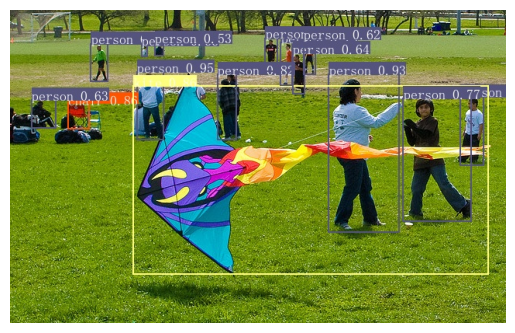

In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# # Đường dẫn đến ảnh
# image_path = "/content/PaddleDetection/output/000000014439.jpg"

# # Đọc và hiển thị ảnh
# img = mpimg.imread(image_path)
# plt.imshow(img)
# plt.axis('off')  # Tắt hiển thị trục
# plt.show()

# **Download data**

In [15]:
# !wget https://bj.bcebos.com/v1/paddledet/data/mot/image_lists.zip

--2024-12-03 15:22:53--  https://bj.bcebos.com/v1/paddledet/data/mot/image_lists.zip
Resolving bj.bcebos.com (bj.bcebos.com)... 103.235.47.176, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to bj.bcebos.com (bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4331342 (4.1M) [application/zip]
Saving to: ‘image_lists.zip’

image_lists.zip     100%[===================>]   4.13M  4.27MB/s    in 1.0s    

2024-12-03 15:22:55 (4.27 MB/s) - ‘image_lists.zip’ saved [4331342/4331342]



In [16]:
# !unzip -o "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/image_lists.zip" -d "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot"

Archive:  /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/image_lists.zip
   creating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/bdd100kdet_vehicle.train  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/ht21.train  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/mot17.half  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/bdd100k_mcmot.val  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/cuhksysu.val  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/caltech.all  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/image_lists/bdd100kmot_vehicl

In [18]:
# !wget https://bj.bcebos.com/v1/paddledet/data/mot/CUHKSYSU.zip

--2024-12-03 15:25:13--  https://bj.bcebos.com/v1/paddledet/data/mot/CUHKSYSU.zip
Resolving bj.bcebos.com (bj.bcebos.com)... 103.235.47.176, 2409:8c04:1001:1203:0:ff:b0bb:4f27
Connecting to bj.bcebos.com (bj.bcebos.com)|103.235.47.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1069343339 (1020M) [application/zip]
Saving to: ‘CUHKSYSU.zip’

CUHKSYSU.zip        100%[===================>]   1020M  36.7MB/s    in 34s     

2024-12-03 15:25:48 (30.3 MB/s) - ‘CUHKSYSU.zip’ saved [1069343339/1069343339]



In [19]:
# !unzip -o "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/CUHKSYSU.zip" -d "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s17283.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s11564.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s836.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s3204.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s5359.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s1192.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s3758.jpg  
  inflating: /content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/dataset/mot/CUHKSYSU/images/s16442.jpg  
  inflating: /content

# **Training**

In [11]:
# !python --log_dir=./fairmot_dla34_30e_1088x608/ --gpus 0 tools/train.py -c configs/mot/fairmot/fairmot_dla34_30e_1088x608.yml

unknown option --log_dir=./fairmot_dla34_30e_1088x608/
usage: python3 [option] ... [-c cmd | -m mod | file | -] [arg] ...
Try `python -h' for more information.


In [13]:
import os

def get_filename_from_path(path):
    if os.path.isfile(path) or os.path.basename(path):
        return os.path.basename(path)
    return None

# Ví dụ
path = "dataset/mot/CUHKSYSU/labels_with_ids/s10010.txt"
filename = get_filename_from_path(path)

if filename:
    print(f"Tên tệp: {filename}")
else:
    print("Không tìm thấy tệp trong đường dẫn!")


Tên tệp: s10010.txt


In [11]:
!export CUDA_VISIBLE_DEVICES=0

In [16]:
!python tools/train.py -c configs/mot/fairmot/fairmot_dla34_30e_1088x608.yml

Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/tools/train.py", line 212, in <module>
    main()
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/tools/train.py", line 208, in main
    run(FLAGS, cfg)
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/tools/train.py", line 148, in run
    trainer = Trainer(cfg, mode='train')
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/ppdet/engine/trainer.py", line 121, in __init__
    self.loader = create('{}Reader'.format(capital_mode))(
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/ppdet/data/reader.py", line 190, in __call__
    self.dataset.parse_dataset()
  File "/content/drive/MyDrive/Colab Notebooks/SN-GSR/PaddleDetection/ppdet/data/source/mot.py", line 146, in parse_dataset
    lb = np.loadtxt(lp)
  File "/usr/local/lib/python3.10/dist-packages/numpy/lib/npyio.py", line 1373, in loadtxt
    arr = _

# **Infer**

In [19]:
!python tools/infer_mot.py -c configs/mot/fairmot/fairmot_dla34_30e_1088x608.yml -o weights=https://paddledet.bj.bcebos.com/models/mot/fairmot_dla34_30e_1088x608.pdparams --video_file="/content/test.mp4" --save_videos

W1203 16:08:15.863648  4925 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.2, Runtime API Version: 12.0
W1203 16:08:15.864883  4925 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
[12/03 16:08:15] ppdet.data.source.category WARNING: anno_file 'None' is None or not set or not exist, please recheck TrainDataset/EvalDataset/TestDataset.anno_path, otherwise the default categories will be used by metric_type.
[12/03 16:08:15] ppdet.data.source.category WARNING: metric_type: MOT, load default categories of pedestrian MOT.
[12/03 16:08:18] ppdet.utils.checkpoint INFO: Finish resuming model weights: /root/.cache/paddle/weights/fairmot_dla34_30e_1088x608.pdparams
[12/03 16:08:35] ppdet.data.source.mot INFO: Length of the video: 100 frames.
[12/03 16:08:35] ppdet.engine.tracker INFO: Starting tracking video /content/test.mp4
100% 100/100 [00:26<00:00,  3.72it/s]
ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg develo